https://github.com/jpdeleon/epoch/tree/main/notebooks

In [1]:
from aesthetic.plot import set_style, savefig
set_style("science")

In [5]:
from urllib.request import urlopen
import json

target = "TOI-5671.01"
url = f"https://exofop.ipac.caltech.edu/tess/target.php?id={target}&json"
response = urlopen(url)
data_json = json.loads(response.read())
data_json['coordinates']

{'ra': '211.009219627329',
 'dec': '+38.618330983651603',
 'galactic_long': '74.64171',
 'galactic_lat': '70.97229',
 'ecliptic_long': '190.2457',
 'ecliptic_lat': '47.11664',
 'pm_ra': '-44.6441',
 'pm_ra_error': '.0534319',
 'pm_dec': '15.0831',
 'pm_dec_error': '.0718341'}

In [6]:
ra  = float(data_json['coordinates']['ra'])      # target coord in deg
dec = float(data_json['coordinates']['dec'])       # target coord in deg
ra, dec

(211.009219627329, 38.6183309836516)

In [15]:
from astropy.io import fits

# fp ='../data/ogg2m001-ep05-20220630-0307-e91.fits'
fp = '/data/MuSCAT3/220630/ogg2m001-ep05-20220630-0107-e91.fits'
hdr = fits.getheader(fp)
data = fits.getdata(fp)

In [16]:
hdr['OBJECT'] #nearby star

'TOI5648'

In [79]:
ra, dec

(211.009219627329, 38.6183309836516)

Set OBSGEO-B to    20.706900 from OBSGEO-[XYZ].
Set OBSGEO-H to     3047.597 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


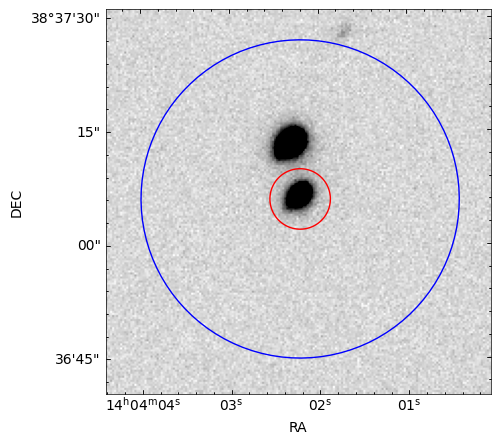

In [96]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval, ImageNormalize
from astropy.coordinates import SkyCoord
from matplotlib.patches import Circle, Rectangle
from astropy.visualization.wcsaxes import SphericalCircle

wcs = WCS(hdr)
coords = wcs.all_world2pix(np.c_[ra,dec], 0)
xpix, ypix = int(coords[0][0]), int(coords[0][1])

M3_pix_scale = hdr['PIXSCALE']*u.arcsec/u.pix
TESS_rad_arcsec = 21*u.arcsec
fov = 1.2*TESS_pix

dx = dy = round((fov/M3_pix_scale).value)

fig = plt.figure(figsize=(5,5))

dcrop = data[ypix-dy:ypix+dy,xpix-dx:xpix+dx]
wcscrop = wcs[ypix-dy:ypix+dy,xpix-dx:xpix+dx]
norm = ImageNormalize(dcrop, interval=ZScaleInterval(contrast=0.1))

ax = fig.add_subplot(111, projection=wcscrop)
ax.imshow(dcrop, norm=norm, cmap='gray_r')
skycoord_object = SkyCoord(ra * u.deg, dec * u.deg)
s = SphericalCircle(skycoord_object, 15*u.pix * M3_pix_scale,
                    edgecolor='red', facecolor='none',
                    transform=ax.get_transform('fk5'))

ax.add_patch(s)

s = SphericalCircle(skycoord_object, 21 * u.arcsec,
                    edgecolor='blue', facecolor='none',
                    transform=ax.get_transform('fk5'))

ax.add_patch(s)
ax.set_xlabel("RA")
ax.set_ylabel("DEC")